#Regression Model

In [ ]:
import pandas as pd
import statsmodels.api as sm

file_path = "/content/sample_data/model_price (1).xlsx"
xls = pd.ExcelFile(file_path)
IVOL_list = []
BestIVOL_list = []
for sheet_name in xls.sheet_names:
    df = xls.parse(sheet_name)
    if 'IVOL' in df.columns and 'BestIVOL' in df.columns:
        IVOL_list.extend(df['IVOL'].dropna().tolist())
        BestIVOL_list.extend(df['BestIVOL'].dropna().tolist())

data = pd.DataFrame({'IVOL': IVOL_list, 'BestIVOL': BestIVOL_list})

X1 = sm.add_constant(data['IVOL'])
y = data['BestIVOL']
model1 = sm.OLS(y, X1).fit()
X2 = data['IVOL']
model2 = sm.OLS(y, X2).fit()

print("Model 1: BestIVOL = beta_0 + beta_1 * IVOL")
print(model1.summary())

print("\nModel 2: BestIVOL = beta_1 * IVOL (No Intercept)")
print(model2.summary())


Model 1: BestIVOL = beta_0 + beta_1 * IVOL
                            OLS Regression Results                            
Dep. Variable:               BestIVOL   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     4459.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:52:23   Log-Likelihood:            -2.1013e+05
No. Observations:               47578   AIC:                         4.203e+05
Df Residuals:                   47576   BIC:                         4.203e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import statsmodels.api as sm

file_path = "/content/sample_data/model_price (1).xlsx"
xls = pd.ExcelFile(file_path)
IVOL_list = []
BestIVOL_list = []
for sheet_name in xls.sheet_names:
    df = xls.parse(sheet_name)
    if 'IVOL' in df.columns and 'BestIVOL' in df.columns:
        IVOL_list.extend(df['IVOL'].dropna().tolist())
        BestIVOL_list.extend(df['BestIVOL'].dropna().tolist())

data = pd.DataFrame({'IVOL': IVOL_list, 'BestIVOL': BestIVOL_list})

X1 = sm.add_constant(data['IVOL'])
y = data['BestIVOL']
model1 = sm.OLS(y, X1).fit()
X2 = data['IVOL']
model2 = sm.OLS(y, X2).fit()
data['Pred_Model1'] = model1.predict(X1)
data['Pred_Model2'] = model2.predict(X2)
rmse_model1 = mean_squared_error(data['BestIVOL'], data['Pred_Model1']) ** 0.5
r2_model1 = r2_score(data['BestIVOL'], data['Pred_Model1'])

rmse_model2 = mean_squared_error(data['BestIVOL'], data['Pred_Model2']) ** 0.5
r2_model2 = r2_score(data['BestIVOL'], data['Pred_Model2'])
model_comparison = pd.DataFrame({
    'Model': ['BestIVOL = β₀ + β₁ * IVOL', 'BestIVOL = β₁ * IVOL (No Intercept)'],
    'RMSE': [rmse_model1, rmse_model2],
    'R-squared': [r2_model1, r2_model2]
})
print(model_comparison)


                                 Model       RMSE  R-squared
0            BestIVOL = β₀ + β₁ * IVOL  20.037661   0.085700
1  BestIVOL = β₁ * IVOL (No Intercept)  23.199274  -0.225585


* MODELED IVOL and BestIVOL diestribution

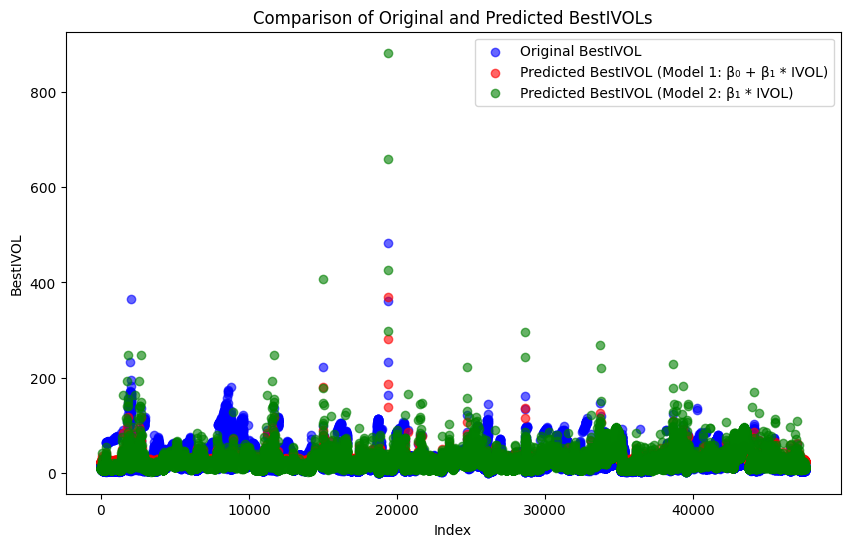

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['BestIVOL'], color='blue', label='Original BestIVOL', alpha=0.6, marker='o')
plt.scatter(data.index, data['Pred_Model1'], color='red', label='Predicted BestIVOL (Model 1: β₀ + β₁ * IVOL)', alpha=0.6, marker='o')
plt.scatter(data.index, data['Pred_Model2'], color='green', label='Predicted BestIVOL (Model 2: β₁ * IVOL)', alpha=0.6, marker='o')
plt.xlabel('Index')
plt.ylabel('BestIVOL')
plt.title('Comparison of Original and Predicted BestIVOLs')
plt.legend()
plt.show()


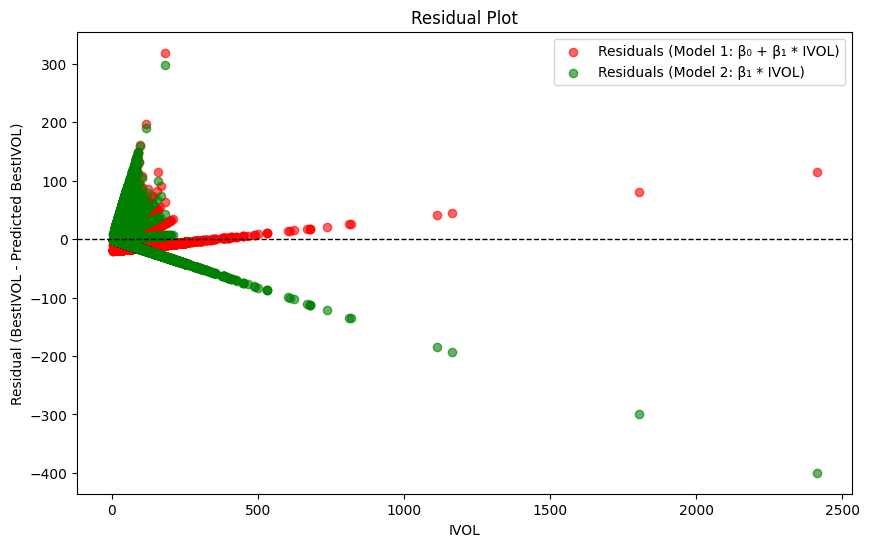

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['IVOL'], data['BestIVOL'] - data['Pred_Model1'], color='red', alpha=0.6, label="Residuals (Model 1: β₀ + β₁ * IVOL)")
plt.scatter(data['IVOL'], data['BestIVOL'] - data['Pred_Model2'], color='green', alpha=0.6, label="Residuals (Model 2: β₁ * IVOL)")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('IVOL')
plt.ylabel('Residual (BestIVOL - Predicted BestIVOL)')
plt.title('Residual Plot')
plt.legend()
plt.show()


Observations:
Patterns in Residuals:

The residuals fan out as IVOL increases, meaning that predictions become more spread out and less accurate for larger IVOL values.
This suggests heteroscedasticity (variance of residuals is not constant), which could indicate that a simple linear model might not be the best fit.
Comparison of the Two Models:

Red points (Model 1: BestIVOL = β₀ + β₁ * IVOL):
Shows some overestimation and underestimation, but errors are more balanced around zero.
Green points (Model 2: BestIVOL = β₁ * IVOL, No Intercept):
More extreme errors, especially for larger IVOL values.
This suggests the no-intercept model might not be capturing the data pattern well.
Outliers:

Some residuals are far from zero, especially at higher IVOL values.
These could indicate the presence of outliers or that a non-linear model might be needed.


# Log_transformation approach


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

file_path = "/content/sample_data/model_price (1).xlsx"
xls = pd.ExcelFile(file_path)
IVOL_list = []
BestIVOL_list = []
for sheet_name in xls.sheet_names:
    df = xls.parse(sheet_name)
    if 'IVOL' in df.columns and 'BestIVOL' in df.columns:
        IVOL_list.extend(df['IVOL'].dropna().tolist())
        BestIVOL_list.extend(df['BestIVOL'].dropna().tolist())

data = pd.DataFrame({'IVOL': IVOL_list, 'BestIVOL': BestIVOL_list})
data['Log_IVOL'] = np.log1p(data['IVOL'])
data['Log_BestIVOL'] = np.log1p(data['BestIVOL'])

X1_log = sm.add_constant(data['Log_IVOL'])
y_log = data['Log_BestIVOL']
model1_log = sm.OLS(y_log, X1_log).fit()
X2_log = data['Log_IVOL']
model2_log = sm.OLS(y_log, X2_log).fit()

print("Log-Log Model 1: log(BestIVOL) = beta_0 + beta_1 * log(IVOL)")
print(model1_log.summary())
print("\nLog-Log Model 2: log(BestIVOL) = beta_1 * log(IVOL) (No Intercept)")
print(model2_log.summary())


Log-Log Model 1: log(BestIVOL) = beta_0 + beta_1 * log(IVOL)
                            OLS Regression Results                            
Dep. Variable:           Log_BestIVOL   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     8401.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:52:36   Log-Likelihood:                -49120.
No. Observations:               47578   AIC:                         9.824e+04
Df Residuals:                   47576   BIC:                         9.826e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

* Log-transformed model comparison

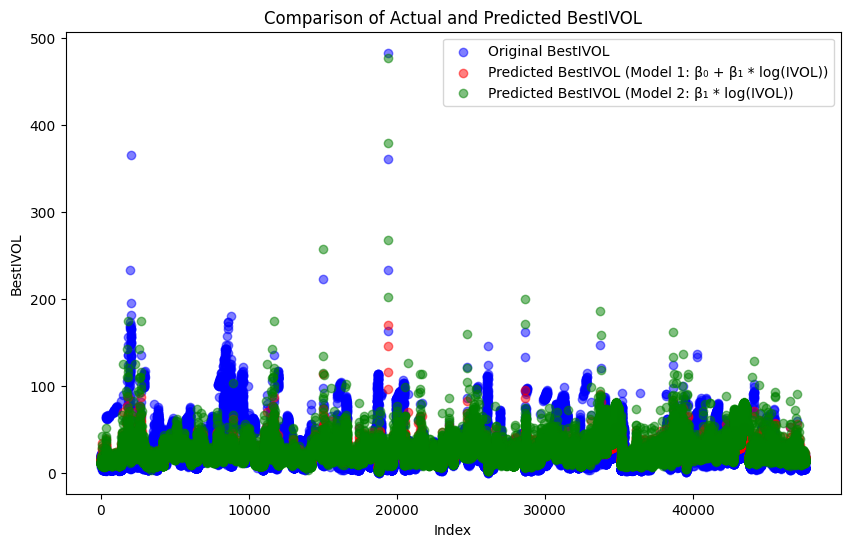

In [ ]:
data['Pred_Model1_Log'] = model1_log.predict(X1_log)
data['Pred_Model2_Log'] = model2_log.predict(X2_log)
data['Pred_Model1'] = np.expm1(data['Pred_Model1_Log'])
data['Pred_Model2'] = np.expm1(data['Pred_Model2_Log'])

plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['BestIVOL'], color='blue', alpha=0.5, label='Original BestIVOL')
plt.scatter(data.index, data['Pred_Model1'], color='red', alpha=0.5, label='Predicted BestIVOL (Model 1: β₀ + β₁ * log(IVOL))')
plt.scatter(data.index, data['Pred_Model2'], color='green', alpha=0.5, label='Predicted BestIVOL (Model 2: β₁ * log(IVOL))')
plt.xlabel('Index')
plt.ylabel('BestIVOL')
plt.title('Comparison of Actual and Predicted BestIVOL')
plt.legend()
plt.show()


* Log-transformed residual plot

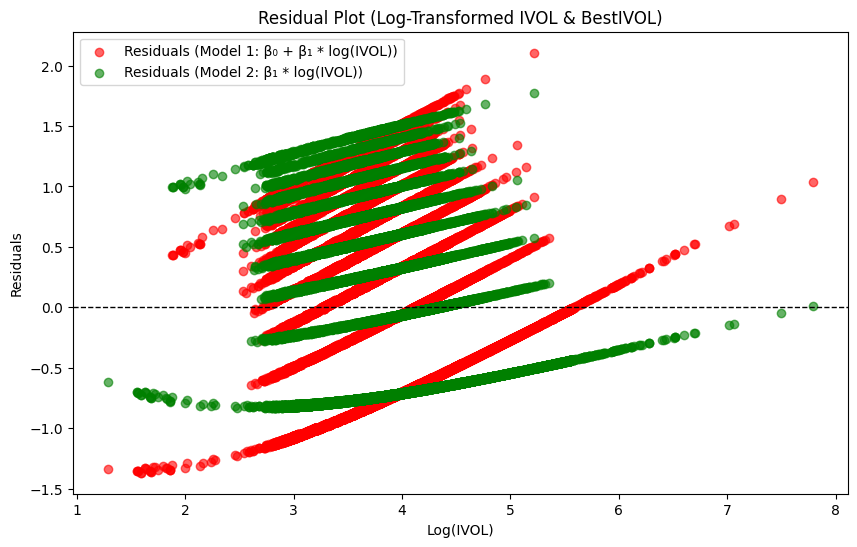

In [ ]:
import matplotlib.pyplot as plt

data['Residual_Model1_Log'] = y_log - model1_log.predict(X1_log)
data['Residual_Model2_Log'] = y_log - model2_log.predict(X2_log)

plt.figure(figsize=(10, 6))
plt.scatter(data['Log_IVOL'], data['Residual_Model1_Log'], color='red', alpha=0.6, label="Residuals (Model 1: β₀ + β₁ * log(IVOL))")
plt.scatter(data['Log_IVOL'], data['Residual_Model2_Log'], color='green', alpha=0.6, label="Residuals (Model 2: β₁ * log(IVOL))")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Log(IVOL)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Log-Transformed IVOL & BestIVOL)')
plt.legend()
plt.show()


#Regreesion on REIT-Mortgage

In [ ]:
import pandas as pd
import statsmodels.api as sm

sector_file_path = "/content/sample_data/CB fixed parameters.xlsx"
model_file_path = "/content/sample_data/model_price (1).xlsx"
df_sector = pd.read_excel(sector_file_path)

bond_names = df_sector.iloc[0]
industries = df_sector.iloc[9]
relevant_bonds = bond_names[industries == 'REIT - Mortgage'].dropna().tolist()
xls = pd.ExcelFile(model_file_path)

matching_bonds = [bond for bond in relevant_bonds if bond in xls.sheet_names]
missing_bonds = [bond for bond in relevant_bonds if bond not in xls.sheet_names]
print(f"Total Relevant Bonds: {len(relevant_bonds)}")
print(f"Bonds found in model_price.xlsx: {matching_bonds}")
print(f"Bonds missing in model_price.xlsx: {missing_bonds}")

IVOL_list = []
BestIVOL_list = []
for bond in matching_bonds:
    df = xls.parse(bond)
    if 'IVOL' in df.columns and 'BestIVOL' in df.columns:
        IVOL_list.extend(df['IVOL'].dropna().tolist())
        BestIVOL_list.extend(df['BestIVOL'].dropna().tolist())

data = pd.DataFrame({'IVOL': IVOL_list, 'BestIVOL': BestIVOL_list})

if data.empty:
    print("No IVOL and BestIVOL data found for the selected bonds.")
else:
    X1 = sm.add_constant(data['IVOL'])
    y = data['BestIVOL']
    model1 = sm.OLS(y, X1).fit()
    X2 = data['IVOL']
    model2 = sm.OLS(y, X2).fit()

    print("\nModel 1: BestIVOL = beta_0 + beta_1 * IVOL")
    print(model1.summary())

    print("\nModel 2: BestIVOL = beta_1 * IVOL (No Intercept)")
    print(model2.summary())


Total Relevant Bonds: 10
Bonds found in model_price.xlsx: ['IHFLIN 4.5 09 28 26 Corp', 'ABR 7.5 08 01 25 Corp', 'TWO 6.25 01 15 26 Corp', 'STWD 6.75 07 15 27 Corp', 'PMT 5.5 11 01 24 Corp', 'IHFLIN 4.5 03 04 26 Corp', 'RWT 5.75 10 01 25 Corp', 'PMT 5.5 03 15 26 Corp', 'RWT 5.625 07 15 24 Corp', 'MITT 6.75 09 15 24 Corp']
Bonds missing in model_price.xlsx: []

Model 1: BestIVOL = beta_0 + beta_1 * IVOL
                            OLS Regression Results                            
Dep. Variable:               BestIVOL   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                 1.137e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:42:43   Log-Likelihood:                -25120.
No. Observations:                6550   AIC:                         5.024e+04
Df Residuals:                    6548   BI

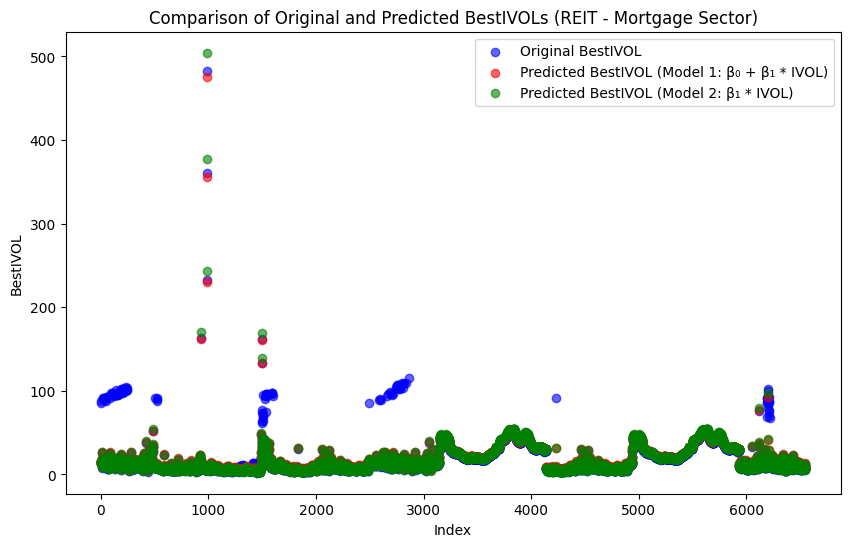

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

data['Pred_Model1'] = model1.predict(sm.add_constant(data['IVOL']))
data['Pred_Model2'] = model2.predict(data['IVOL'])

plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['BestIVOL'], color='blue', label='Original BestIVOL', alpha=0.6, marker='o')
plt.scatter(data.index, data['Pred_Model1'], color='red', label='Predicted BestIVOL (Model 1: β₀ + β₁ * IVOL)', alpha=0.6, marker='o')
plt.scatter(data.index, data['Pred_Model2'], color='green', label='Predicted BestIVOL (Model 2: β₁ * IVOL)', alpha=0.6, marker='o')
plt.xlabel('Index')
plt.ylabel('BestIVOL')
plt.title('Comparison of Original and Predicted BestIVOLs (REIT - Mortgage Sector)')
plt.legend()
plt.show()


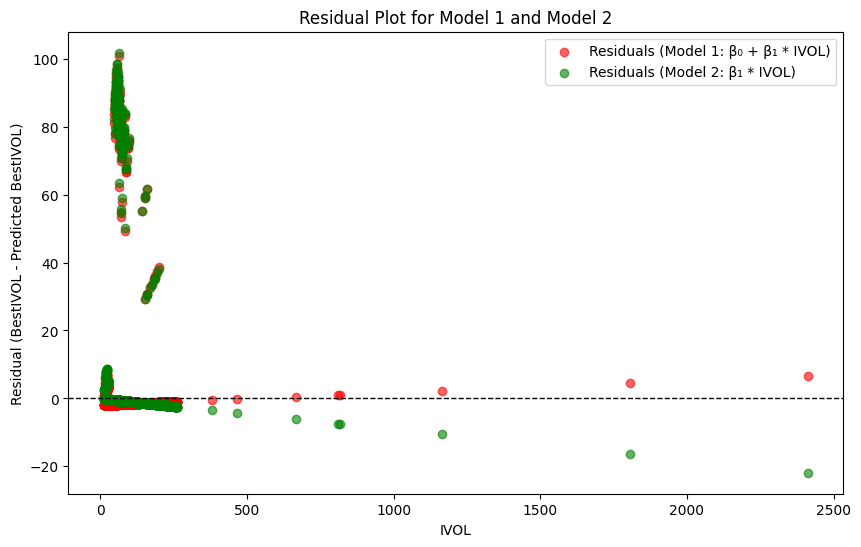

In [ ]:
import matplotlib.pyplot as plt

data['Residual_Model1'] = data['BestIVOL'] - model1.predict(sm.add_constant(data['IVOL']))
data['Residual_Model2'] = data['BestIVOL'] - model2.predict(data['IVOL'])

plt.figure(figsize=(10, 6))
plt.scatter(data['IVOL'], data['Residual_Model1'], color='red', alpha=0.6, label="Residuals (Model 1: β₀ + β₁ * IVOL)")
plt.scatter(data['IVOL'], data['Residual_Model2'], color='green', alpha=0.6, label="Residuals (Model 2: β₁ * IVOL)")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('IVOL')
plt.ylabel('Residual (BestIVOL - Predicted BestIVOL)')
plt.title('Residual Plot for Model 1 and Model 2')
plt.legend()
plt.show()


The residual plot for Model 1 (β₀ + β₁ * IVOL) and Model 2 (β₁ * IVOL, no intercept) shows that most residuals are concentrated near zero, indicating that the models perform reasonably well overall. However, there are distinct clusters of large residuals at low IVOL values, suggesting potential heteroscedasticity, where the variance of errors changes across IVOL levels. Additionally, a few extreme residuals indicate that the models struggle to predict BestIVOL accurately for certain IVOL values. The spread of residuals decreases as IVOL increases, hinting that a non-linear relationship may exist between IVOL and BestIVOL, which the linear models fail to capture.

Moreover, Model 1 and Model 2 behave similarly for most observations, but diverge in some cases, particularly at low IVOL values. The presence of systematic patterns in the residuals suggests that the regression assumptions (such as constant variance and linearity) might not fully hold. To improve the model, a log transformation of IVOL could stabilize variance, and higher-order polynomial regression could better capture any non-linearity in the relationship. Checking for outliers in IVOL and BestIVOL is also crucial, as extreme values might be influencing the regression results disproportionately.

* Log-normal approach

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load data from Excel, keeping each bond separate
file_path = "/content/sample_data/model_price (1).xlsx"
xls = pd.ExcelFile(file_path)
bond_data = {}

for sheet_name in xls.sheet_names:
    df = xls.parse(sheet_name)
    if 'IVOL' in df.columns and 'BestIVOL' in df.columns:
        bond_data[sheet_name] = df[['IVOL', 'BestIVOL']].dropna()  # Store bond data separately

# 2. Get all bond names
all_bonds = list(bond_data.keys())

# 3. Split bonds: 80% training, 20% testing
train_bonds, test_bonds = train_test_split(all_bonds, test_size=0.2, random_state=42)

# 4. Separate training and testing data
train_data = pd.concat([bond_data[bond] for bond in train_bonds])
test_data = pd.concat([bond_data[bond] for bond in test_bonds])

# 5. Prepare features (X) and target (y)
X_train_1 = sm.add_constant(train_data['IVOL'])  # Model 1 (with intercept)
y_train = train_data['BestIVOL']

X_train_2 = train_data['IVOL']  # Model 2 (without intercept)

# 6. Fit Model 1 (with intercept)
model1_train = sm.OLS(y_train, X_train_1).fit()
print("Model 1 (with intercept) Training Summary:")
print(model1_train.summary())

# 7. Fit Model 2 (without intercept)
model2_train = sm.OLS(y_train, X_train_2).fit()
print("\nModel 2 (without intercept) Training Summary:")
print(model2_train.summary())

# 8. Prepare test set for evaluation
X_test_1 = sm.add_constant(test_data['IVOL'])
y_test = test_data['BestIVOL']

# Predict using Model 1
y_pred_1 = model1_train.predict(X_test_1)

# Predict using Model 2 (no intercept)
X_test_2 = test_data['IVOL']
y_pred_2 = model2_train.predict(X_test_2)

# 9. Compute performance metrics
mse_model1 = mean_squared_error(y_test, y_pred_1)
r2_model1 = r2_score(y_test, y_pred_1)

mse_model2 = mean_squared_error(y_test, y_pred_2)
r2_model2 = r2_score(y_test, y_pred_2)

print("\nModel 1 (with intercept) - Test Performance")
print(f"MSE: {mse_model1:.4f}, R-squared: {r2_model1:.4f}")

print("\nModel 2 (without intercept) - Test Performance")
print(f"MSE: {mse_model2:.4f}, R-squared: {r2_model2:.4f}")


Model 1 (with intercept) Training Summary:
                            OLS Regression Results                            
Dep. Variable:               BestIVOL   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3382.
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:35:16   Log-Likelihood:            -1.7164e+05
No. Observations:               38534   AIC:                         3.433e+05
Df Residuals:                   38532   BIC:                         3.433e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

#Regular regression with train-test split

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load data
file_path = "/content/sample_data/model_price (1).xlsx"
xls = pd.ExcelFile(file_path)
bond_data = {}  # Dictionary to store bond-level data

for sheet_name in xls.sheet_names:
    df = xls.parse(sheet_name)
    if 'IVOL' in df.columns and 'BestIVOL' in df.columns:
        bond_data[sheet_name] = df[['IVOL', 'BestIVOL']].dropna()  # Store bond data separately

# Step 1: Identify all bonds
all_bonds = list(bond_data.keys())

# Step 2: Split bonds into 80% training and 20% testing
train_bonds, test_bonds = train_test_split(all_bonds, test_size=0.2, random_state=42)

# Step 3: Create separate training and testing datasets
train_data = pd.concat([bond_data[bond] for bond in train_bonds])
test_data = pd.concat([bond_data[bond] for bond in test_bonds])

# Apply log transformation
train_data['Log_IVOL'] = np.log1p(train_data['IVOL'])
train_data['Log_BestIVOL'] = np.log1p(train_data['BestIVOL'])

test_data['Log_IVOL'] = np.log1p(test_data['IVOL'])
test_data['Log_BestIVOL'] = np.log1p(test_data['BestIVOL'])

# Train the models
X_train_1 = sm.add_constant(train_data['Log_IVOL'])  # With intercept
y_train = train_data['Log_BestIVOL']
model1_log_train = sm.OLS(y_train, X_train_1).fit()

X_train_2 = train_data['Log_IVOL']  # Without intercept
model2_log_train = sm.OLS(y_train, X_train_2).fit()

print("Log-Log Model 1 (with intercept) Training Summary:")
print(model1_log_train.summary())

print("\nLog-Log Model 2 (no intercept) Training Summary:")
print(model2_log_train.summary())

# Step 4: Evaluate on test set
X_test_1 = sm.add_constant(test_data['Log_IVOL'])   # For Model 1
y_test_log = test_data['Log_BestIVOL']

# Model 1 predictions
y_pred_log_1 = model1_log_train.predict(X_test_1)

# Model 2 predictions
X_test_2 = test_data['Log_IVOL']
y_pred_log_2 = model2_log_train.predict(X_test_2)

# Convert back to original scale
y_pred_1 = np.expm1(y_pred_log_1)
y_pred_2 = np.expm1(y_pred_log_2)
y_test_actual = test_data['BestIVOL']

# Compute evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse_model1 = mean_squared_error(y_test_actual, y_pred_1)
r2_model1 = r2_score(y_test_actual, y_pred_1)

mse_model2 = mean_squared_error(y_test_actual, y_pred_2)
r2_model2 = r2_score(y_test_actual, y_pred_2)

print("\nModel 1 (Log-Log with Intercept) - Test Performance")
print(f"MSE: {mse_model1:.4f}, R-squared: {r2_model1:.4f}")

print("\nModel 2 (Log-Log No Intercept) - Test Performance")
print(f"MSE: {mse_model2:.4f}, R-squared: {r2_model2:.4f}")


Model 1 (With Intercept) - TRAIN:
                            OLS Regression Results                            
Dep. Variable:               BestIVOL   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     3743.
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:07:04   Log-Likelihood:            -1.6832e+05
No. Observations:               38062   AIC:                         3.366e+05
Df Residuals:                   38060   BIC:                         3.367e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5

1. **Overfitting on the Training Set:**  
   - Even with an R-squared of around 0.5 in training, the no-intercept model could be capturing quirks or outliers specific to the training sample. When those quirks don’t generalize to new data, performance tanks on the test set.

2. **Model Misspecification (Forcing No Intercept):**  
   - In reality, the relationship between IVOL and BestIVOL likely does not pass through the origin, so forcing the intercept to zero distorts the model’s predictions.  
   - This mismatch becomes evident in the test set, where the errors grow large enough that you see a negative R-squared and a higher MSE compared to the model that includes an intercept.

3. **Data Distribution Differences:**  
   - If the test set has a slightly different distribution (e.g., higher or lower IVOL values), the no-intercept model’s assumption can lead to extreme under- or over-predictions, again hurting performance.


* Lasso Regreesion

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load data
file_path = "/content/sample_data/model_price (1).xlsx"
xls = pd.ExcelFile(file_path)
bond_data = {}  # Dictionary to store bond-level data

for sheet_name in xls.sheet_names:
    df = xls.parse(sheet_name)
    if 'IVOL' in df.columns and 'BestIVOL' in df.columns:
        bond_data[sheet_name] = df[['IVOL', 'BestIVOL']].dropna()  # Store bond data separately

# Step 1: Identify all bonds
all_bonds = list(bond_data.keys())

# Step 2: Split bonds into 80% training and 20% testing
train_bonds, test_bonds = train_test_split(all_bonds, test_size=0.2, random_state=42)

# Step 3: Create separate training and testing datasets
train_data = pd.concat([bond_data[bond] for bond in train_bonds])
test_data = pd.concat([bond_data[bond] for bond in test_bonds])

# Apply log transformation
train_data['Log_IVOL'] = np.log1p(train_data['IVOL'])
train_data['Log_BestIVOL'] = np.log1p(train_data['BestIVOL'])

test_data['Log_IVOL'] = np.log1p(test_data['IVOL'])
test_data['Log_BestIVOL'] = np.log1p(test_data['BestIVOL'])

# -------------------------
# OLS REGRESSION MODELS
# -------------------------

# Train OLS Model 1 (With Intercept)
X_train_1 = sm.add_constant(train_data['Log_IVOL'])
y_train = train_data['Log_BestIVOL']
model1_log_train = sm.OLS(y_train, X_train_1).fit()

# Train OLS Model 2 (No Intercept)
X_train_2 = train_data['Log_IVOL']
model2_log_train = sm.OLS(y_train, X_train_2).fit()

print("Log-Log Model 1 (with intercept) Training Summary:")
print(model1_log_train.summary())

print("\nLog-Log Model 2 (no intercept) Training Summary:")
print(model2_log_train.summary())

# Evaluate on test set
X_test_1 = sm.add_constant(test_data['Log_IVOL'])
y_test_log = test_data['Log_BestIVOL']

# Model 1 predictions
y_pred_log_1 = model1_log_train.predict(X_test_1)

# Model 2 predictions
X_test_2 = test_data['Log_IVOL']
y_pred_log_2 = model2_log_train.predict(X_test_2)

# Convert back to original scale
y_pred_1 = np.expm1(y_pred_log_1)
y_pred_2 = np.expm1(y_pred_log_2)
y_test_actual = test_data['BestIVOL']

# Compute evaluation metrics
mse_model1 = mean_squared_error(y_test_actual, y_pred_1)
r2_model1 = r2_score(y_test_actual, y_pred_1)

mse_model2 = mean_squared_error(y_test_actual, y_pred_2)
r2_model2 = r2_score(y_test_actual, y_pred_2)

print("\nModel 1 (Log-Log with Intercept) - Test Performance")
print(f"MSE: {mse_model1:.4f}, R-squared: {r2_model1:.4f}")

print("\nModel 2 (Log-Log No Intercept) - Test Performance")
print(f"MSE: {mse_model2:.4f}, R-squared: {r2_model2:.4f}")

# -------------------------
# LASSO REGRESSION MODELS
# -------------------------

# Standardize IVOL for Lasso regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data[['Log_IVOL']])
X_test_scaled = scaler.transform(test_data[['Log_IVOL']])

# Lasso with Hyperparameter Tuning (With Intercept)
lasso_cv_1 = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5)  # 5-fold CV
lasso_cv_1.fit(X_train_scaled, y_train)

best_alpha_1 = lasso_cv_1.alpha_
print(f"\nBest alpha for Lasso (with intercept): {best_alpha_1:.6f}")

# Predict using Lasso with intercept
y_pred_lasso_1 = lasso_cv_1.predict(X_test_scaled)

# Evaluate Lasso Model 1
mse_lasso_1 = mean_squared_error(y_test_actual, np.expm1(y_pred_lasso_1))
r2_lasso_1 = r2_score(y_test_actual, np.expm1(y_pred_lasso_1))

print("\nLasso Regression (with intercept) - Test Performance")
print(f"Lasso Test MSE: {mse_lasso_1:.4f}")
print(f"Lasso Test R^2: {r2_lasso_1:.4f}")
print(f"Lasso Coefficients (with intercept): {lasso_cv_1.coef_}")

# Lasso with Hyperparameter Tuning (No Intercept)
lasso_cv_2 = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5, fit_intercept=False)
lasso_cv_2.fit(X_train_scaled, y_train)

best_alpha_2 = lasso_cv_2.alpha_
print(f"\nBest alpha for Lasso (no intercept): {best_alpha_2:.6f}")

# Predict using Lasso without intercept
y_pred_lasso_2 = lasso_cv_2.predict(X_test_scaled)

# Evaluate Lasso Model 2
mse_lasso_2 = mean_squared_error(y_test_actual, np.expm1(y_pred_lasso_2))
r2_lasso_2 = r2_score(y_test_actual, np.expm1(y_pred_lasso_2))

print("\nLasso Regression (no intercept) - Test Performance")
print(f"Lasso Test MSE: {mse_lasso_2:.4f}")
print(f"Lasso Test R^2: {r2_lasso_2:.4f}")
print(f"Lasso Coefficients (no intercept): {lasso_cv_2.coef_}")


Log-Log Model 1 (with intercept) Training Summary:
                            OLS Regression Results                            
Dep. Variable:           Log_BestIVOL   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     7026.
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:33:05   Log-Likelihood:                -40650.
No. Observations:               38534   AIC:                         8.130e+04
Df Residuals:                   38532   BIC:                         8.132e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

# Logrithmic Approach Train-Test split

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load data
file_path = "/content/sample_data/model_price (1).xlsx"
xls = pd.ExcelFile(file_path)
bond_data = {}  # Dictionary to store bond-level data

for sheet_name in xls.sheet_names:
    df = xls.parse(sheet_name)
    if 'IVOL' in df.columns and 'BestIVOL' in df.columns:
        bond_data[sheet_name] = df[['IVOL', 'BestIVOL']].dropna()  # Store bond data separately

# Step 1: Identify all bonds
all_bonds = list(bond_data.keys())

# Step 2: Split bonds into 80% training and 20% testing
train_bonds, test_bonds = train_test_split(all_bonds, test_size=0.2, random_state=42)

# Step 3: Create separate training and testing datasets
train_data = pd.concat([bond_data[bond] for bond in train_bonds])
test_data = pd.concat([bond_data[bond] for bond in test_bonds])

# Apply log transformation
train_data['Log_IVOL'] = np.log1p(train_data['IVOL'])
train_data['Log_BestIVOL'] = np.log1p(train_data['BestIVOL'])

test_data['Log_IVOL'] = np.log1p(test_data['IVOL'])
test_data['Log_BestIVOL'] = np.log1p(test_data['BestIVOL'])

# Train the models
X_train_1 = sm.add_constant(train_data['Log_IVOL'])  # With intercept
y_train = train_data['Log_BestIVOL']
model1_log_train = sm.OLS(y_train, X_train_1).fit()

X_train_2 = train_data['Log_IVOL']  # Without intercept
model2_log_train = sm.OLS(y_train, X_train_2).fit()

print("Log-Log Model 1 (with intercept) Training Summary:")
print(model1_log_train.summary())

print("\nLog-Log Model 2 (no intercept) Training Summary:")
print(model2_log_train.summary())

# Step 4: Evaluate on test set
X_test_1 = sm.add_constant(test_data['Log_IVOL'])   # For Model 1
y_test_log = test_data['Log_BestIVOL']

# Model 1 predictions
y_pred_log_1 = model1_log_train.predict(X_test_1)

# Model 2 predictions
X_test_2 = test_data['Log_IVOL']
y_pred_log_2 = model2_log_train.predict(X_test_2)

# Convert back to original scale
y_pred_1 = np.expm1(y_pred_log_1)
y_pred_2 = np.expm1(y_pred_log_2)
y_test_actual = test_data['BestIVOL']

# Compute evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse_model1 = mean_squared_error(y_test_actual, y_pred_1)
r2_model1 = r2_score(y_test_actual, y_pred_1)

mse_model2 = mean_squared_error(y_test_actual, y_pred_2)
r2_model2 = r2_score(y_test_actual, y_pred_2)

print("\nModel 1 (Log-Log with Intercept) - Test Performance")
print(f"MSE: {mse_model1:.4f}, R-squared: {r2_model1:.4f}")

print("\nModel 2 (Log-Log No Intercept) - Test Performance")
print(f"MSE: {mse_model2:.4f}, R-squared: {r2_model2:.4f}")


Log-Log Model 1 (with intercept) Training Summary:
                            OLS Regression Results                            
Dep. Variable:           Log_BestIVOL   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     7026.
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:33:14   Log-Likelihood:                -40650.
No. Observations:               38534   AIC:                         8.130e+04
Df Residuals:                   38532   BIC:                         8.132e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

# Indutry train test split

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sector_file_path = "/content/sample_data/CB fixed parameters.xlsx"
model_file_path = "/content/sample_data/model_price (1).xlsx"
df_sector = pd.read_excel(sector_file_path)

# Identify REIT - Mortgage bonds
bond_names = df_sector.iloc[0]
industries = df_sector.iloc[9]
relevant_bonds = bond_names[industries == 'REIT - Mortgage'].dropna().tolist()

# Load Excel file containing IVOL / BestIVOL data
xls = pd.ExcelFile(model_file_path)

# Check which bonds are present
matching_bonds = [bond for bond in relevant_bonds if bond in xls.sheet_names]
missing_bonds = [bond for bond in relevant_bonds if bond not in xls.sheet_names]
print(f"Total Relevant Bonds: {len(relevant_bonds)}")
print(f"Bonds found in model_price.xlsx: {matching_bonds}")
print(f"Bonds missing in model_price.xlsx: {missing_bonds}")

# Collect IVOL and BestIVOL data for the matching bonds
IVOL_list = []
BestIVOL_list = []
for bond in matching_bonds:
    df = xls.parse(bond)
    if 'IVOL' in df.columns and 'BestIVOL' in df.columns:
        IVOL_list.extend(df['IVOL'].dropna().tolist())
        BestIVOL_list.extend(df['BestIVOL'].dropna().tolist())

data = pd.DataFrame({'IVOL': IVOL_list, 'BestIVOL': BestIVOL_list})

if data.empty:
    print("No IVOL and BestIVOL data found for the selected bonds.")
else:
    # 1. Split into train (80%) and test (20%)
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

    # ----------------
    # MODEL 1: With Intercept
    # ----------------

    # 2. Fit the model on the training set
    X_train_1 = sm.add_constant(train_data['IVOL'])  # add constant for intercept
    y_train = train_data['BestIVOL']
    model1 = sm.OLS(y_train, X_train_1).fit()

    print("\nModel 1: BestIVOL = beta_0 + beta_1 * IVOL (TRAIN SET)")
    print(model1.summary())

    # 3. Evaluate Model 1 on the test set
    X_test_1 = sm.add_constant(test_data['IVOL'])
    y_test = test_data['BestIVOL']
    y_pred_1 = model1.predict(X_test_1)

    mse_model1 = mean_squared_error(y_test, y_pred_1)
    r2_model1 = r2_score(y_test, y_pred_1)
    print(f"\nModel 1 Test MSE: {mse_model1:.4f}")
    print(f"Model 1 Test R^2: {r2_model1:.4f}")

    # ----------------
    # MODEL 2: No Intercept
    # ----------------

    # 4. Fit the model on the training set (no constant)
    X_train_2 = train_data['IVOL']
    model2 = sm.OLS(y_train, X_train_2).fit()

    print("\nModel 2: BestIVOL = beta_1 * IVOL (No Intercept, TRAIN SET)")
    print(model2.summary())

    # 5. Evaluate Model 2 on the test set
    X_test_2 = test_data['IVOL']
    y_pred_2 = model2.predict(X_test_2)

    mse_model2 = mean_squared_error(y_test, y_pred_2)
    r2_model2 = r2_score(y_test, y_pred_2)
    print(f"\nModel 2 Test MSE: {mse_model2:.4f}")
    print(f"Model 2 Test R^2: {r2_model2:.4f}")


Total Relevant Bonds: 10
Bonds found in model_price.xlsx: ['IHFLIN 4.5 09 28 26 Corp', 'ABR 7.5 08 01 25 Corp', 'TWO 6.25 01 15 26 Corp', 'STWD 6.75 07 15 27 Corp', 'PMT 5.5 11 01 24 Corp', 'IHFLIN 4.5 03 04 26 Corp', 'RWT 5.75 10 01 25 Corp', 'PMT 5.5 03 15 26 Corp', 'RWT 5.625 07 15 24 Corp', 'MITT 6.75 09 15 24 Corp']
Bonds missing in model_price.xlsx: []

Model 1: BestIVOL = beta_0 + beta_1 * IVOL (TRAIN SET)
                            OLS Regression Results                            
Dep. Variable:               BestIVOL   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                 1.005e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:15:44   Log-Likelihood:                -20050.
No. Observations:                5240   AIC:                         4.010e+04
Df Residuals:                 

* with lasso

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --------------------------------------------------------------------
# 1) Load the datasets
# --------------------------------------------------------------------
model_file_path = "/content/sample_data/model_price (1).xlsx"
sector_file_path = "/content/sample_data/CB fixed parameters.xlsx"

xls_main = pd.ExcelFile(model_file_path)
df_sector = pd.read_excel(sector_file_path)

# --------------------------------------------------------------------
# 2) From df_sector, extract Bond_Name -> Industry
#    - bond_names_row = df_sector.iloc[0]
#    - industry_row   = df_sector.iloc[9]
# --------------------------------------------------------------------
bond_names_row = df_sector.iloc[0]
industry_row = df_sector.iloc[9]

# Create a mapping of bond name -> industry
bond_industry_map = dict(zip(bond_names_row[1:], industry_row[1:]))

# --------------------------------------------------------------------
# 3) Extract IVOL, BestIVOL, and Date from each sheet in model_price
# --------------------------------------------------------------------
IVOL_list = []
BestIVOL_list = []
Bond_names = []
dates = []

for sheet_name in xls_main.sheet_names:
    df = xls_main.parse(sheet_name)
    # Convert first column to datetime
    df["Date"] = pd.to_datetime(df.iloc[:, 0], errors="coerce")

    # Only keep rows where Date, IVOL, and BestIVOL are all present
    if "IVOL" in df.columns and "BestIVOL" in df.columns:
        df_valid = df.dropna(subset=["Date", "IVOL", "BestIVOL"])
        if not df_valid.empty:
            IVOL_list.extend(df_valid["IVOL"].tolist())
            BestIVOL_list.extend(df_valid["BestIVOL"].tolist())
            Bond_names.extend([sheet_name] * len(df_valid))
            dates.extend(df_valid["Date"].tolist())

df_main = pd.DataFrame({
    "Bond_Name": Bond_names,
    "Date": dates,
    "IVOL": IVOL_list,
    "BestIVOL": BestIVOL_list
})

# --------------------------------------------------------------------
# 4) Extract Bond parameters (Maturity Date, Conversion Price)
# --------------------------------------------------------------------
df_extra = pd.read_excel(sector_file_path, sheet_name="Sheet1")

# Extract bond names from the first row
bond_names_array = df_extra.iloc[0, 1:].values

# Extract Maturity Dates
maturity_dates = df_extra[df_extra.iloc[:, 0] == "Maturity Date"].iloc[:, 1:].T
maturity_dates.columns = ["Maturity_Date"]
maturity_dates["Bond_Name"] = bond_names_array
maturity_dates["Maturity_Date"] = pd.to_datetime(maturity_dates["Maturity_Date"], errors="coerce")

# Extract Conversion Prices
conversion_prices = df_extra[df_extra.iloc[:, 0] == "Conversion Price"].iloc[:, 1:].T
conversion_prices.columns = ["Conversion_Price"]
conversion_prices["Bond_Name"] = bond_names_array
conversion_prices["Conversion_Price"] = pd.to_numeric(conversion_prices["Conversion_Price"], errors="coerce")

# Merge them into a single dataset
df_bond_params = pd.merge(
    maturity_dates,
    conversion_prices,
    on="Bond_Name",
    how="inner"
)

# --------------------------------------------------------------------
# 5) Extract Stock Prices (S), compute Moneyness, Time-to-Maturity
# --------------------------------------------------------------------
moneyness_data = []
ttm_data = []

for sheet_name in xls_main.sheet_names:
    if sheet_name in df_bond_params["Bond_Name"].values:
        df_sheet = xls_main.parse(sheet_name)
        df_sheet["Date"] = pd.to_datetime(df_sheet.iloc[:, 0], errors="coerce")
        df_sheet = df_sheet.dropna(subset=["Date"])

        # Retrieve this bond's Maturity Date & Conversion Price
        bond_maturity_date = df_bond_params.loc[
            df_bond_params["Bond_Name"] == sheet_name,
            "Maturity_Date"
        ].values[0]
        bond_conversion_price = df_bond_params.loc[
            df_bond_params["Bond_Name"] == sheet_name,
            "Conversion_Price"
        ].values[0]

        if "S" in df_sheet.columns:
            for _, row in df_sheet.iterrows():
                stock_price = row["S"]
                ttm_value = (bond_maturity_date - row["Date"]).days / 365.0
                moneyness_value = stock_price / bond_conversion_price

                moneyness_data.append({
                    "Bond_Name": sheet_name,
                    "Date": row["Date"],
                    "Moneyness": moneyness_value
                })
                ttm_data.append({
                    "Bond_Name": sheet_name,
                    "Date": row["Date"],
                    "Time_to_Maturity": ttm_value
                })

df_moneyness = pd.DataFrame(moneyness_data)
df_ttm_dynamic = pd.DataFrame(ttm_data)

# --------------------------------------------------------------------
# 6) Merge df_main, df_moneyness, df_ttm_dynamic
# --------------------------------------------------------------------
df_final = pd.merge(df_main, df_moneyness, on=["Bond_Name", "Date"], how="inner")
df_final = pd.merge(df_final, df_ttm_dynamic, on=["Bond_Name", "Date"], how="inner")
df_final.dropna(subset=["IVOL", "BestIVOL", "Moneyness", "Time_to_Maturity"], inplace=True)

# --------------------------------------------------------------------
# 7) Add the Industry column
# --------------------------------------------------------------------
# Map each Bond_Name to its industry (if in bond_industry_map), else None
df_final["Industry"] = df_final["Bond_Name"].map(bond_industry_map)

# Example: Print unique industries
print("Unique industries in final data:", df_final["Industry"].unique())

# --------------------------------------------------------------------
# 8a) Approach A: FILTER to only REIT - Mortgage bonds
# --------------------------------------------------------------------
df_final_reit = df_final[df_final["Industry"] == "REIT - Mortgage"].copy()

print("\nShape of df_final_reit (REIT - Mortgage only):", df_final_reit.shape)

# Train-test split on REIT - Mortgage subset
train_data_reit, test_data_reit = train_test_split(df_final_reit, test_size=0.2, random_state=42)

X_train_reit = train_data_reit[["IVOL", "Moneyness", "Time_to_Maturity"]]
y_train_reit = train_data_reit["BestIVOL"]

X_test_reit = test_data_reit[["IVOL", "Moneyness", "Time_to_Maturity"]]
y_test_reit = test_data_reit["BestIVOL"]

# REIT - Mortgage Model (with intercept)
X_train_reit_intercept = sm.add_constant(X_train_reit)
model_reit_with_intercept = sm.OLS(y_train_reit, X_train_reit_intercept).fit()

# Evaluate on REIT test set
X_test_reit_intercept = sm.add_constant(X_test_reit)
y_pred_reit = model_reit_with_intercept.predict(X_test_reit_intercept)

mse_reit = mean_squared_error(y_test_reit, y_pred_reit)
r2_reit = r2_score(y_test_reit, y_pred_reit)

print("\n=== REIT - Mortgage Model (with intercept) ===")
print(model_reit_with_intercept.summary())
print(f"MSE (test): {mse_reit:.4f}, R^2 (test): {r2_reit:.4f}")



Unique industries in final data: ['Utilities - Regulated Electric' 'Telecom Services' 'Consumer Cyclicals'
 'Industry not found' 'Banks - Diversified' 'Capital Markets'
 'Travel Services' 'Airlines' 'Auto Manufacturers'
 'Drug Manufacturers - Specialty & Generic' 'Oil & Gas Drilling'
 'REIT - Healthcare Facilities' 'Utilities - Independent Power Producers'
 'Health Information Services' 'REIT - Mortgage' 'Software - Application'
 'Integrated Freight & Logistics' 'Internet - Software' 'Entertainment'
 'Electronic Gaming & Multimedia' 'Software - Infrastructure'
 'Diagnostics & Research' 'Biotechnology' 'Utilities - Regulated Water'
 'Lodging' 'Internet Content & Information' 'Internet Retail'
 'Advertising Agencies' 'Utilities - Renewable' 'Asset Management'
 'Security & Protection Services' 'IT Services'
 'Trading Companies and Distributors' 'Specialty Industrial Machinery'
 'Recreational Vehicles' 'Semiconductors']

Shape of df_final_reit (REIT - Mortgage only): (6550, 7)

=== REIT - 